# Homework # 2 - Exploratory Data Analysis & Data Preparation - Solution
Data files: white_wine_quality.csv & shoppers.csv

## Part 1: Exploratory Data Analysis

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load data

In [2]:
! head 'data/white_wine_quality.csv'

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6


In [3]:
# Read data from file into dataframe
# Note: field separator is ;
df = pd.read_csv("data/white_wine_quality.csv", sep=';')

### Examine data

In [4]:
# Display dataframe shape
df.shape

(4898, 12)

In [5]:
# Display first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Generate summary statistics on data

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Generate insights on the dependent variable

In [7]:
# Display the distinct classes (quality)
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [8]:
# Display the counts for each class (quality)
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

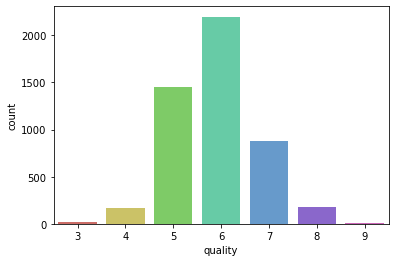

In [9]:
# Display (i.e. bar graph) the distribution of the classes (quality)
sns.countplot(x='quality', data=df, palette='hls')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='Count'>

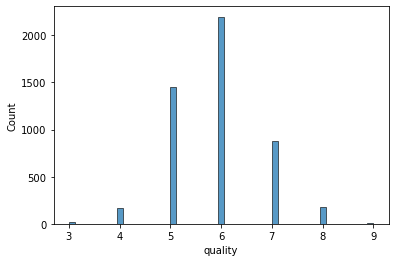

In [10]:
sns.histplot(df.quality)

### Visualize the correlation matrix using a heatmap in seaborn

<AxesSubplot:>

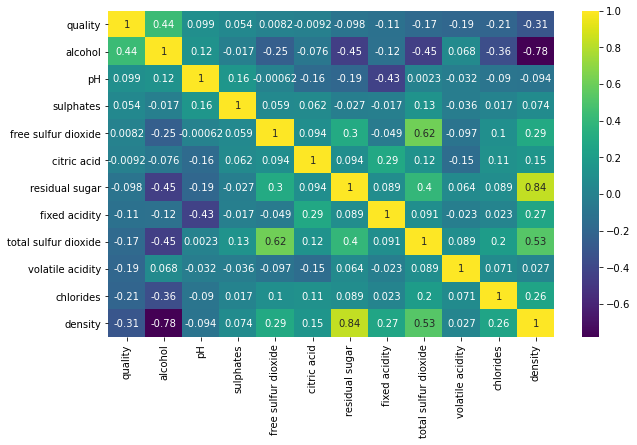

In [11]:
# Display the correlation matrix
k = 12     # number of variables for heatmap
cols = df.corr().nlargest(k, 'quality')['quality'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

## Part 2: Data Preparation

### Import libraries

In [12]:
from sklearn.impute import SimpleImputer                         # for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder    # for encoding categorical data
from sklearn.model_selection import train_test_split             # for splitting training and testing data
from sklearn.preprocessing import StandardScaler                 # for feature scaling

### Load new dataset

In [13]:
! head 'data/shoppers.csv'

Region,Age,Income,Online Shopper
India,49,86400,No
Brazil,32,57600,Yes
USA,35,64800,No
Brazil,43,73200,No
USA,45,,Yes
India,40,69600,Yes
Brazil,,62400,No
India,53,94800,Yes
USA,55,99600,No


In [14]:
# Read data from file into dataframe
df2 = pd.read_csv('data/shoppers.csv')

### Examine new dataset

In [15]:
# Review data
df2

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


### Identify missing values

In [16]:
df2.isnull().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

### Impute missing values

In [17]:
# Create temporary dataframe 1 with only Age and Income columns
df2a = df2[['Age', 'Income']]
df2a

,Age,Income
0,49.0,86400.0
1,32.0,57600.0
2,35.0,64800.0
3,43.0,73200.0
4,45.0,NaN
5,40.0,69600.0
6,NaN,62400.0
7,53.0,94800.0
8,55.0,99600.0
9,42.0,80400.0


In [18]:
# Replace missing values with mean of all the other values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df2a)
tmp = imputer.transform(df2a)
tmp

array([[4.90000000e+01, 8.64000000e+04],
       [3.20000000e+01, 5.76000000e+04],
       [3.50000000e+01, 6.48000000e+04],
       [4.30000000e+01, 7.32000000e+04],
       [4.50000000e+01, 7.65333333e+04],
       [4.00000000e+01, 6.96000000e+04],
       [4.37777778e+01, 6.24000000e+04],
       [5.30000000e+01, 9.48000000e+04],
       [5.50000000e+01, 9.96000000e+04],
       [4.20000000e+01, 8.04000000e+04]])

In [19]:
# Create temporary dataframe 2 with post-imputation data
df2b = pd.DataFrame(tmp, columns=['Age','Income'])
df2b

,Age,Income
0,49.000000,86400.000000
1,32.000000,57600.000000
2,35.000000,64800.000000
3,43.000000,73200.000000
4,45.000000,76533.333333
5,40.000000,69600.000000
6,43.777778,62400.000000
7,53.000000,94800.000000
8,55.000000,99600.000000
9,42.000000,80400.000000


In [20]:
# Alternative method to impute missing values:
df2c = df2a.fillna(df2a.mean())
df2c

,Age,Income
0,49.000000,86400.000000
1,32.000000,57600.000000
2,35.000000,64800.000000
3,43.000000,73200.000000
4,45.000000,76533.333333
5,40.000000,69600.000000
6,43.777778,62400.000000
7,53.000000,94800.000000
8,55.000000,99600.000000
9,42.000000,80400.000000


In [21]:
# Drop Age and Income columns in original dataframe
df2.drop(['Age','Income'], axis=1, inplace=True)

In [22]:
# Add imputed columns Age and Income to original dataframe
df3 = df2.join(df2b)

In [23]:
df3.isnull().sum()

Region            0
Online Shopper    0
Age               0
Income            0
dtype: int64

In [24]:
# Display dataframe rows
df3

,Region,Online Shopper,Age,Income
0,India,No,49.000000,86400.000000
1,Brazil,Yes,32.000000,57600.000000
2,USA,No,35.000000,64800.000000
3,Brazil,No,43.000000,73200.000000
4,USA,Yes,45.000000,76533.333333
5,India,Yes,40.000000,69600.000000
6,Brazil,No,43.777778,62400.000000
7,India,Yes,53.000000,94800.000000
8,USA,No,55.000000,99600.000000
9,India,Yes,42.000000,80400.000000


### Generate one-hot encodings for Region column

In [25]:
# List unique values for Region
df3['Region'].unique()

array(['India', 'Brazil', 'USA'], dtype=object)

In [26]:
# Generate encodings for Region
df3_ohe1 = pd.get_dummies(df3['Region'])
df3_ohe1.head()

,Brazil,India,USA
0,0,1,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [27]:
# Join dataframe with Region-encoded dataframe
df4 = df3.join(df3_ohe1)
df4.head()

,Region,Online Shopper,Age,Income,Brazil,India,USA
0,India,No,49.0,86400.000000,0,1,0
1,Brazil,Yes,32.0,57600.000000,1,0,0
2,USA,No,35.0,64800.000000,0,0,1
3,Brazil,No,43.0,73200.000000,1,0,0
4,USA,Yes,45.0,76533.333333,0,0,1


In [28]:
# Drop Region column since it is now encoded
df4.drop(['Region'], axis=1, inplace=True)
df4.head()

,Online Shopper,Age,Income,Brazil,India,USA
0,No,49.0,86400.000000,0,1,0
1,Yes,32.0,57600.000000,1,0,0
2,No,35.0,64800.000000,0,0,1
3,No,43.0,73200.000000,1,0,0
4,Yes,45.0,76533.333333,0,0,1


### Encode labels

In [29]:
# Encode Online Shopper column
le = LabelEncoder()
df4['Online Shopper']= le.fit_transform(df4['Online Shopper'])

### Display final dataframe rows

In [30]:
df4

,Online Shopper,Age,Income,Brazil,India,USA
0,0,49.000000,86400.000000,0,1,0
1,1,32.000000,57600.000000,1,0,0
2,0,35.000000,64800.000000,0,0,1
3,0,43.000000,73200.000000,1,0,0
4,1,45.000000,76533.333333,0,0,1
5,1,40.000000,69600.000000,0,1,0
6,0,43.777778,62400.000000,1,0,0
7,1,53.000000,94800.000000,0,1,0
8,0,55.000000,99600.000000,0,0,1
9,1,42.000000,80400.000000,0,1,0
